## Question - 1.A

Analyzing the performance of sales and revenue at the city and branch level.

        City Branch  total_sales  total_revenue
0   Mandalay      A          637       34130.09
1   Mandalay      B          664       37215.93
2   Mandalay      C          519       29794.62
3  Naypyitaw      A          648       35985.64
4  Naypyitaw      B          604       35157.75
5  Naypyitaw      C          579       34160.14
6     Yangon      A          598       33647.27
7     Yangon      B          631       35193.51
8     Yangon      C          630       32302.43


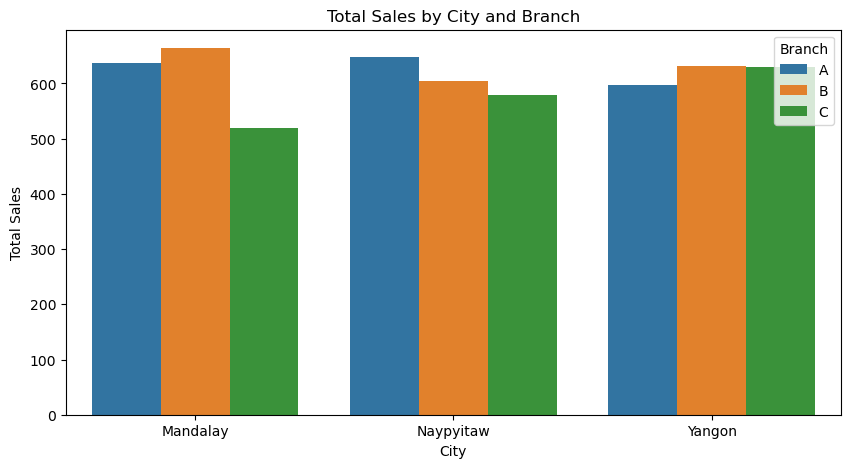

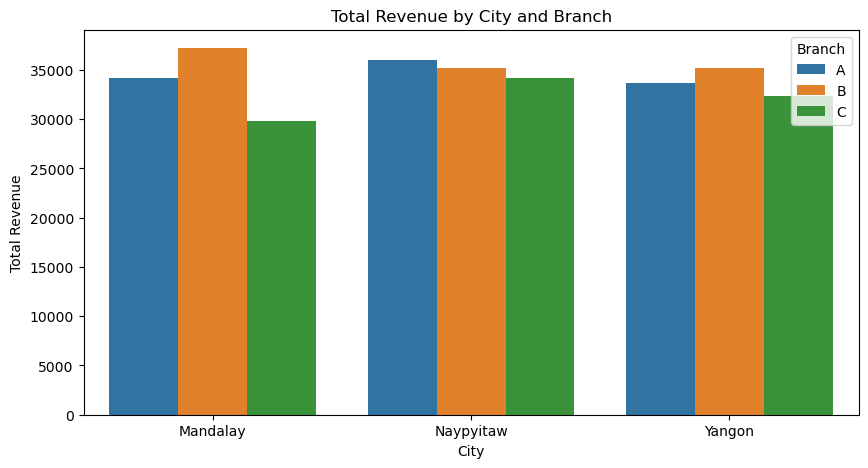

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_excel('Walmart_Sales_CB1799BACC_77EAC63B5D.xlsx')


df['Date'] = pd.to_datetime(df['Date'])
df['Revenue'] = df['Unit price'] * df['Quantity']


sales_summary = df.groupby(['City', 'Branch']).agg(
    total_sales=('Quantity', 'sum'),
    total_revenue=('Revenue', 'sum')
).reset_index()

print(sales_summary)


plt.figure(figsize=(10, 5))
sb.barplot(data=sales_summary, x='City', y='total_sales', hue='Branch')
plt.title('Total Sales by City and Branch')
plt.ylabel('Total Sales')
plt.legend(title='Branch')
plt.show()

plt.figure(figsize=(10, 5))
sb.barplot(data=sales_summary, x='City', y='total_revenue', hue='Branch')
plt.title('Total Revenue by City and Branch')
plt.ylabel('Total Revenue')
plt.legend(title='Branch')
plt.show()



## Question - 1.B

Finding the average price of an item sold at each branch of the city.

        City Branch  total_sales  total_revenue  avg_price
0   Mandalay      A          637       34130.09  53.353866
1   Mandalay      B          664       37215.93  56.133305
2   Mandalay      C          519       29794.62  57.958316
3  Naypyitaw      A          648       35985.64  54.123182
4  Naypyitaw      B          604       35157.75  57.785688
5  Naypyitaw      C          579       34160.14  57.941009
6     Yangon      A          598       33647.27  55.639298
7     Yangon      B          631       35193.51  56.011062
8     Yangon      C          630       32302.43  52.684602


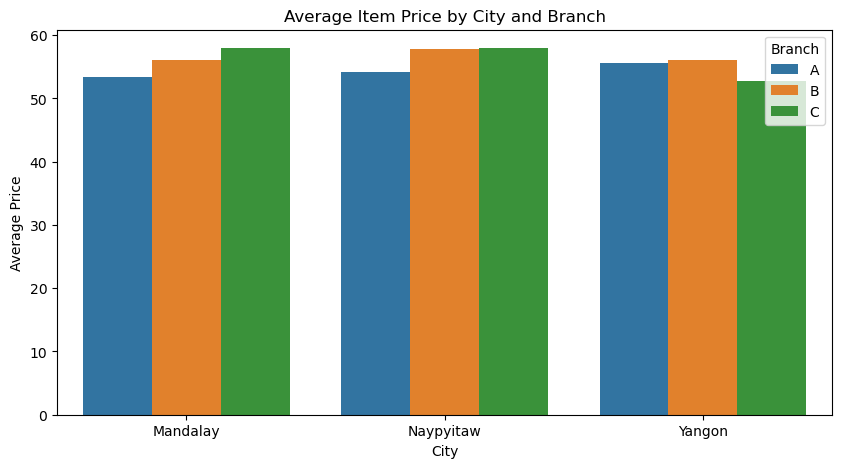

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_excel('Walmart_Sales_CB1799BACC_77EAC63B5D.xlsx')

df['Date'] = pd.to_datetime(df['Date'])
df['Revenue'] = df['Unit price'] * df['Quantity']

sales_summary = df.groupby(['City', 'Branch']).agg(
    total_sales=('Quantity', 'sum'),
    total_revenue=('Revenue', 'sum'),
    avg_price=('Unit price', 'mean')  
).reset_index()


print(sales_summary)

plt.figure(figsize=(10, 5))
sb.barplot(data=sales_summary, x='City', y='avg_price', hue='Branch')
plt.title('Average Item Price by City and Branch')
plt.ylabel('Average Price')
plt.legend(title='Branch')
plt.show()


## Question 1.C

Analyzing the performance of sales and revenue, Month over Month across the Product line, Gender, and Payment Method, and identify the focus areas to get better sales for April 2019 (Based on past 3 months).

In [6]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_excel('Walmart_Sales_CB1799BACC_77EAC63B5D.xlsx')

df['Date'] = pd.to_datetime(df['Date'])


df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Total'] = df['Unit price'] * df['Quantity']

df_3m = df[(df['Year'] == 2019) & (df['Month'].isin([1, 2, 3]))]



Total Revenue (Jan-Mar 2019): 307587.38
Total Invoices: 1000
   Month      Total
0      1  110754.16
1      2   92589.88
2      3  104243.34


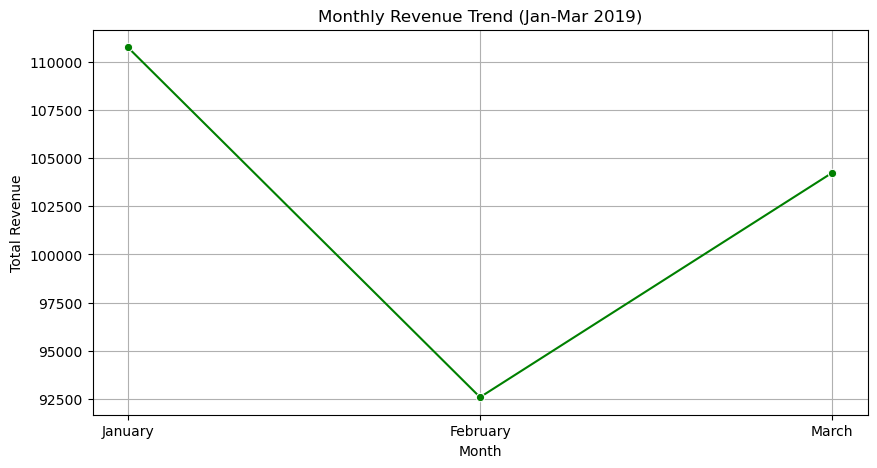

In [7]:
#Monthly Sales and Revenue analysis
total_revenue = df_3m['Total'].sum()
total_invoices = df_3m['Invoice ID'].nunique()

print(f'Total Revenue (Jan-Mar 2019): {total_revenue}')
print(f'Total Invoices: {total_invoices}')

mntly_revenue = df_3m.groupby('Month')['Total'].sum().reset_index()

print(mntly_revenue)

plt.figure(figsize=(10, 5))
sb.lineplot(data=mntly_revenue, x='Month', y='Total', marker='o', color='green')
plt.title('Monthly Revenue Trend (Jan-Mar 2019)')
plt.xticks([1, 2, 3], ['January', 'February', 'March'])
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()


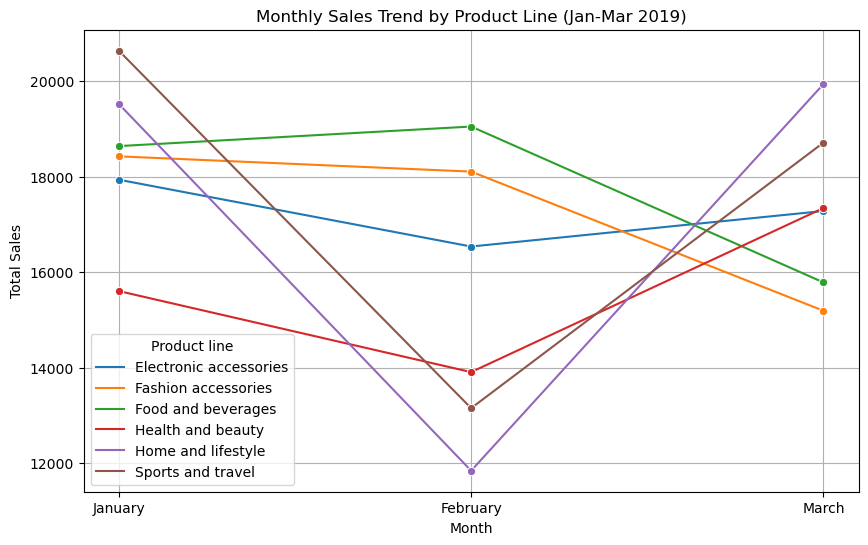

In [8]:
#Monthly sales by product line
prod_trend = df_3m.groupby(['Month', 'Product line'])['Total'].sum().reset_index()
plt.figure(figsize=(10, 6))
sb.lineplot(data=prod_trend, x='Month', y='Total', hue='Product line', marker='o', palette='tab10')
plt.title('Monthly Sales Trend by Product Line (Jan-Mar 2019)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks([1, 2, 3], ['January', 'February', 'March'])
plt.grid(True)
plt.show()


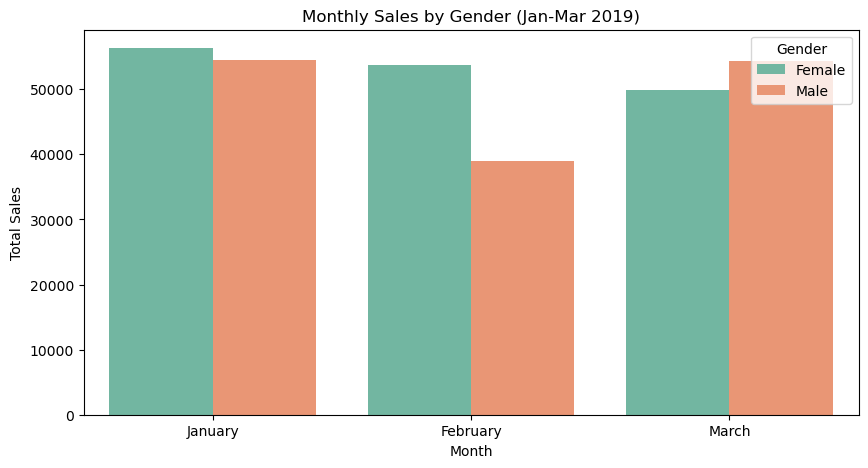

In [9]:
#Monthly sales by Gender
gender_trend = df_3m.groupby(['Month', 'Gender'])['Total'].sum().reset_index()
plt.figure(figsize=(10, 5))
sb.barplot(data=gender_trend, x='Month', y='Total', hue='Gender', palette='Set2')
plt.title('Monthly Sales by Gender (Jan-Mar 2019)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks([0, 1, 2], ['January', 'February', 'March'])
plt.show()


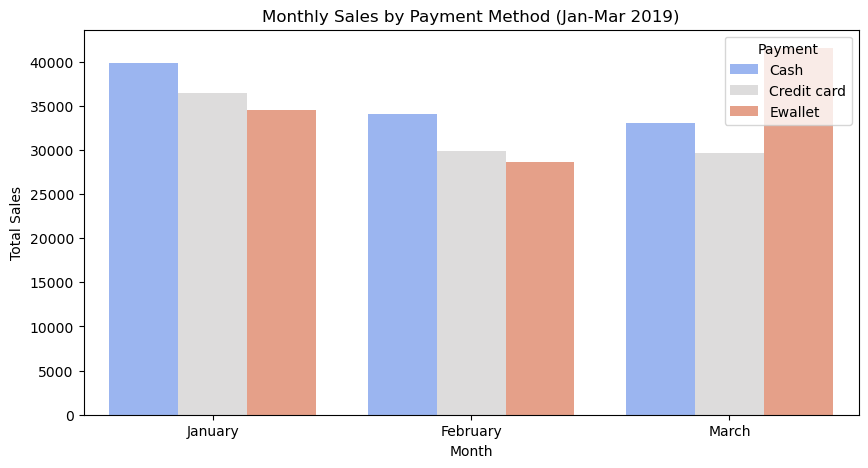

In [10]:
#Monthly sales by payment method
payment_trend = df_3m.groupby(['Month', 'Payment'])['Total'].sum().reset_index()
plt.figure(figsize=(10, 5))
sb.barplot(data=payment_trend, x='Month', y='Total', hue='Payment', palette='coolwarm')
plt.title('Monthly Sales by Payment Method (Jan-Mar 2019)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks([0, 1, 2], ['January', 'February', 'March'])
plt.show()


After analyzing the sales data from January to March 2019,the following insights will help on what to focus for better performance in April.

Product Line Performance:-

Fashion Accessories and Food & Beverages have experienced a consistent decline in sales over the past three months. These categories should receive targeted promotions and marketing efforts in April to boost performance.
Home and Lifestyle saw a significant surge in sales during March, indicating growing customer interest. Leveraging this momentum with special offers or new product launches can drive further growth in April.

Gender-wise Trends:-

The sales patterns for both male and female customers have been largely consistent and similar throughout the three months. There’s no distinct preference or variance in behavior between genders, suggesting balanced engagement strategies will continue to work effectively.

Payment Method Trends:-

Cash is the most preferred payment method, followed by Credit Card and E-wallet.
However, E-wallet usage spiked in March, indicating a potential shift in customer behavior towards digital payments. As a result, Credit Card usage may see a decline in April, so businesses should focus on promoting E-wallet and Cash options to maintain smooth transactions.